<a href="https://www.kaggle.com/code/kelixirr/blinkit-zepto-in-python-groceries-in-seconds?scriptVersionId=147585893" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Groceries In Seconds: Python Implementation Of Blinkit and Zepto : User Facing
### How to create an app like Blinkit and Zepto or any other shopping app in python
#### Author: Amritesh Kumar

In this project, we are going to build a user facing application similar to Zepto and Blinkit where users can place an order and based on their orders we will also see how we can manage the inventory of the store and show users their daily expenses based on order history. 

In [1]:
# let's first create the shopping items
import pandas as pd
items = pd.DataFrame({
    "Papaya Semi Ripe" : pd.Series(["Vegetables", "900g", 99, 10], index = ["Categories", "Details", "Price", "Stock"]),
    "Ginger" : pd.Series(["Vegetables", "200g", 43, 10], index = ["Categories", "Details", "Price", "Stock"]),
    "Chicken Breast" : pd.Series(["Meat", "500g", 220, 10], index = ["Categories", "Details", "Price", "Stock"]),
    "Egg White" : pd.Series(["Meat", "6pc", 76, 10], index = ["Categories", "Details", "Price", "Stock"]),

})

items

,Papaya Semi Ripe,Ginger,Chicken Breast,Egg White
Categories,Vegetables,Vegetables,Meat,Meat
Details,900g,200g,500g,6pc
Price,99,43,220,76
Stock,10,10,10,10


In [17]:
import time
import datetime

class App:
    
    def __init__(self):
        
        """ This application is designed to showcase how one can design an ecommerce platform using python and also to showcase 
        how one can understand the functioning of modern businessness like Zepto and Blinkit. This program just shows 
        the user facing functionality. 
        Author: Amritesh Kumar
        Date: 22nd October 2022
        """
        
        self.cart = []
        self.ongoing_orders = []
        self.orders_history = []
        self.tl = []
        self.expense = []
        self.date = []
        
    def logout(self):
        """ To allow users to remove the app instance"""
        print("To logout from your account. type 'del app' in your terminal")
    
    def buy_items(self):
        """ To allow users to add items to their cart"""
        
        print(items)
        print("\n")
        while True:
            name = input("Input Product Name")
            if name not in items.columns:
                print("Invalid Name.Try again.")      
            else:
                quantity = int(input("Please enter the quantity of the product"))
                if items[name]["Stock"] == 0:
                    print("Item out of stock. Please stay updated and buy something else :)")
                elif quantity <= 0:
                    print("Enter a positive value")
                elif quantity > items[name]["Stock"]:
                    print(f"Please use any value less than or equal to our current stock:{items[name]['Stock']}")
                    quantity = int(input("Please enter the quantity of the product"))
                else:
                    amount = quantity * items[name]["Price"]
                    cart_details = {"Name": name, "Quantity": quantity, "Total Price": amount}
                    self.cart.append(cart_details)
                    response = input("Do you want to add more items Y/N?")
                    if response not in ["Y", "N"]:
                        print("Choose either Y or N")
                        response = input("Do you want to add more items Y/N?")
                    elif response == "Y":
                        continue
                    elif response == "N":
                        break
        print(f"Your current order details are:{self.cart}")
        print("\n")
        
    def clear_cart(self):
        """In case user wants to clear his cart"""
        self.cart.clear()
        print("All the items have been removed")
        
    def place_order(self):
        """Once the user is happy with his cart items. He can place order and sequence of events will take place."""
        
        if len(self.cart) == 0:
            print("Your cart is empty. Please add items to your cart")
        else:
            start_time = time.time()
            date = datetime.datetime.now()
            for i in self.cart:
                items[i["Name"]]["Stock"] = items[i["Name"]]["Stock"] - i["Quantity"]
            for i in self.cart:
                a = i["Total Price"]
                self.tl.append(a)
                subtotal = sum(self.tl)
            self.ongoing_orders = self.cart[:]
            self.cart.clear()
            print("Thank you. Your order has been placed. Please pay via cash/cards on delivery")
            print("You subtotal is:", subtotal)
            print("Please note: Order once placed can't be cancelled.")
            print("\n")
            time.sleep(5)
            print("Order packed")
            time.sleep(5)
            print("Driver has been assigned to your order")
            time.sleep(10)
            print("Your order has been dispatched")
            time.sleep(10)
            print("Your order has reached your location")
            time.sleep(5)
            print("Connecting you to the driver...")
            time.sleep(5)
            print("Order delivered and verified by driver.")
            duration = round((time.time() - start_time), 2)
            time.sleep(5)
            print("Thank you for purchasing with us. Your order has been delivered")
            print(f"Aye! it took only {duration} seconds.")
            delta = datetime.datetime.now()
            delivered_order = {"Order_details": self.ongoing_orders[:],
                               "Subtotal": subtotal,
                               "Date": date.date().strftime('%y-%m-%d'), 
                               "Placed at": date.time().strftime('%a %H:%M:%S'), 
                               "Delivered at": delta.time().strftime('%a %H:%M:%S'), 
                               "Duration in seconds": duration}
            self.orders_history.append(delivered_order)
            self.ongoing_orders.clear()
            
    def contact_support(self):
        """ User can reach out to the customer care executive for help"""
        
        print("If you have any query related to our service or your orders. Please email us at help@groceryinmins.com")
        print(""" A few things that you might be looking for:
              1. Order once placed can't be cancelled or returned. We only offer exchange.
              2. To leave your feedback, please email us
              3. for any other queries reach out to us via email""")
        
    def show_expense(self):
        
        """User can track his expenses date wise. """
        
        for i in self.orders_history:
            self.expense.append(i["Subtotal"])
            self.date.append(i["Date"])
        df = pd.DataFrame({"Spent" : self.expense }, index = [self.date])
    
        df.plot(kind = "bar", 
                title = "User Purchase History", 
                xlabel = "Purchase Date", 
                ylabel = "Amount Spent", 
                rot = "vertical");

In [18]:
a = App()

In [19]:
a.buy_items()

           Papaya Semi Ripe      Ginger Chicken Breast Egg White
Categories       Vegetables  Vegetables           Meat      Meat
Details                900g        200g           500g       6pc
Price                    99          43            220        76
Stock                     5           0              8         0




Input Product Name Chicken Breast
Please enter the quantity of the product 1
Do you want to add more items Y/N? N


Your current order details are:[{'Name': 'Chicken Breast', 'Quantity': 1, 'Total Price': 220}]




In [11]:
a.cart

[{'Name': 'Chicken Breast', 'Quantity': 2, 'Total Price': 440},
 {'Name': 'Papaya Semi Ripe', 'Quantity': 5, 'Total Price': 495}]

In [12]:
a.ongoing_orders

[]

In [20]:
a.place_order()

Thank you. Your order has been placed. Please pay via cash/cards on delivery
You subtotal is: 220
Please note: Order once placed can't be cancelled.


Order packed
Driver has been assigned to your order
Your order has been dispatched
Your order has reached your location
Connecting you to the driver...
Order delivered and verified by driver.
Thank you for purchasing with us. Your order has been delivered
Aye! it took only 40.04 seconds.


In [21]:
a.orders_history

[{'Order_details': [{'Name': 'Chicken Breast',
    'Quantity': 1,
    'Total Price': 220}],
  'Subtotal': 220,
  'Date': '23-10-22',
  'Placed at': 'Mon 15:02:51',
  'Delivered at': 'Mon 15:03:36',
  'Duration in seconds': 40.04}]

In [15]:
a.contact_support()

If you have any query related to our service or your orders. Please email us at help@groceryinmins.com
 A few things that you might be looking for:
              1. Order once placed can't be cancelled or returned. We only offer exchange.
              2. To leave your feedback, please email us
              3. for any other queries reach out to us via email


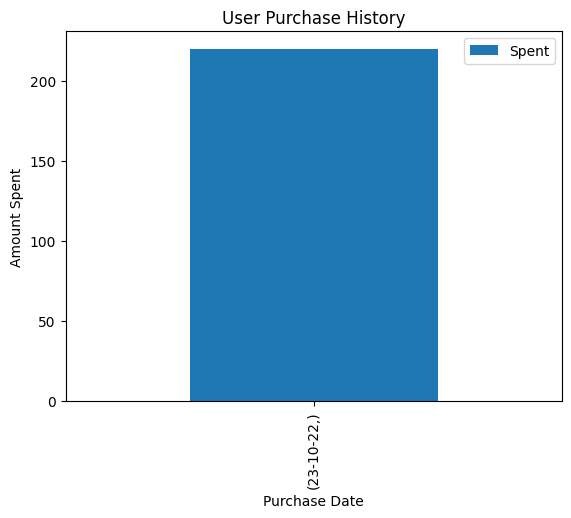

In [22]:
a.show_expense()

Please note: I will keep adding new features to it. So stay tuned. Please ignore some validation steps. 